<a href="https://colab.research.google.com/github/SURESHBEEKHANI/Computer-Vision-Task-Yolo11/blob/main/YOLO11_Image_Classification_on_Custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dyY68vxYBl3amcowxpSw")
project = rf.workspace("bulding").project("tumor3d")
version = project.version(2)
dataset = version.download("folder")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TUMOR3D-2 in folder:: 100%|██████████| 29357/29357 [00:16<00:00, 1729.82it/s]


In [3]:
from ultralytics import YOLO

#loading classification model
model = YOLO('yolo11n-cls.pt')

#train the model
results = model.train(data='/content/TUMOR3D-2', epochs=2, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.52M/5.52M [00:00<00:00, 245MB/s]


Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/TUMOR3D-2, epochs=2, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 5.35M/5.35M [00:00<00:00, 308MB/s]


AMP: checks passed ✅


train: Scanning /content/TUMOR3D-2/train... 28944 images, 0 corrupt: 100%|██████████| 28944/28944 [00:05<00:00, 5204.38it/s]


train: New cache created: /content/TUMOR3D-2/train.cache


val: Scanning /content/TUMOR3D-2/test... 201 images, 0 corrupt: 100%|██████████| 201/201 [00:00<00:00, 2088.06it/s]

val: New cache created: /content/TUMOR3D-2/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 2 epochs...

      Epoch    GPU_mem       loss  Instances       Size


        1/2      1.93G     0.7338         16        640:   0%|          | 6/1809 [00:03<18:11,  1.65it/s]

        1/2      1.93G     0.7184         16        640:   0%|          | 7/1809 [00:03<13:50,  2.17it/s]
100%|██████████| 755k/755k [00:00<00:00, 75.9MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]


                   all      0.776          1

2 epochs completed in 0.615 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 47 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/TUMOR3D-2/train... found 28944 images in 2 classes ✅ 
val: /content/TUMOR3D-2/test... found 201 images in 2 classes ✅ 
test: /content/TUMOR3D-2/test... found 201 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


                   all      0.776          1
Speed: 1.0ms preprocess, 3.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


# Inference

In [4]:
from IPython.display import Image

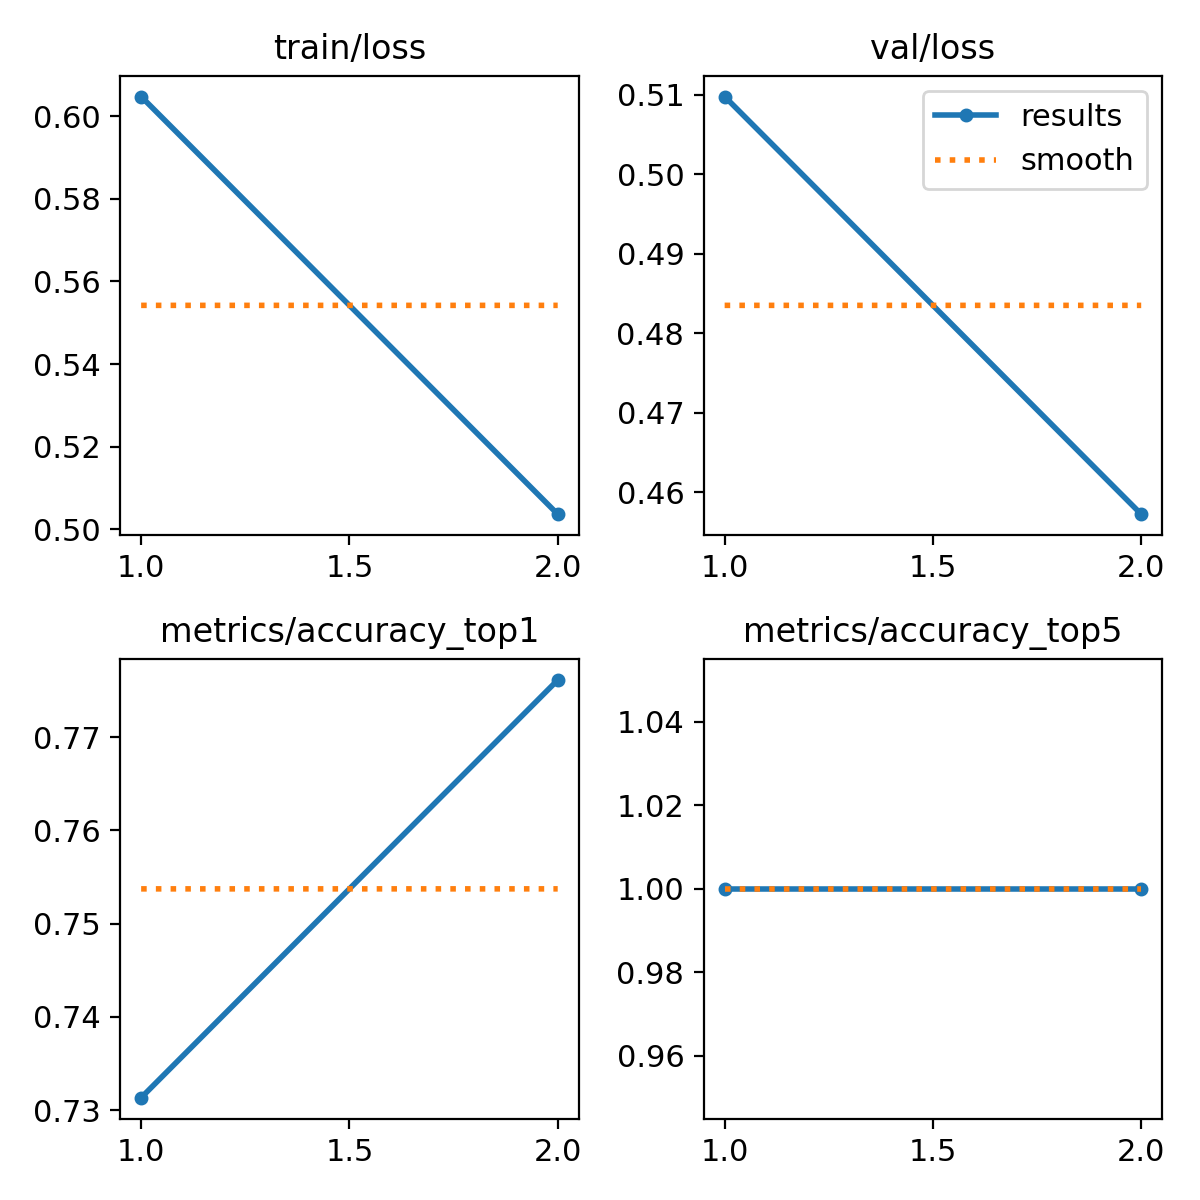

In [5]:

Image("/content/runs/classify/train/results.png", width=600)


image 1/1 /content/abnormal.jpg: 640x640 CT_Normal_Slices 0.54, CT_Abnormal_Slices 0.46, 5.1ms
Speed: 22.3ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


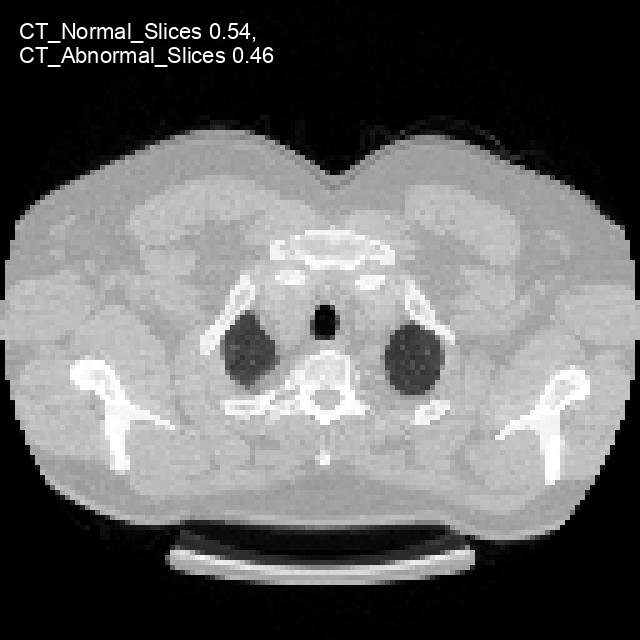

In [6]:
model = YOLO('/content/runs/classify/train/weights/best.pt')

results = model("/content/abnormal.jpg") #, save=True, conf=0.5)
results[0].show()


image 1/1 /content/normal.jpg: 640x640 CT_Normal_Slices 0.52, CT_Abnormal_Slices 0.48, 5.5ms
Speed: 17.1ms preprocess, 5.5ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict


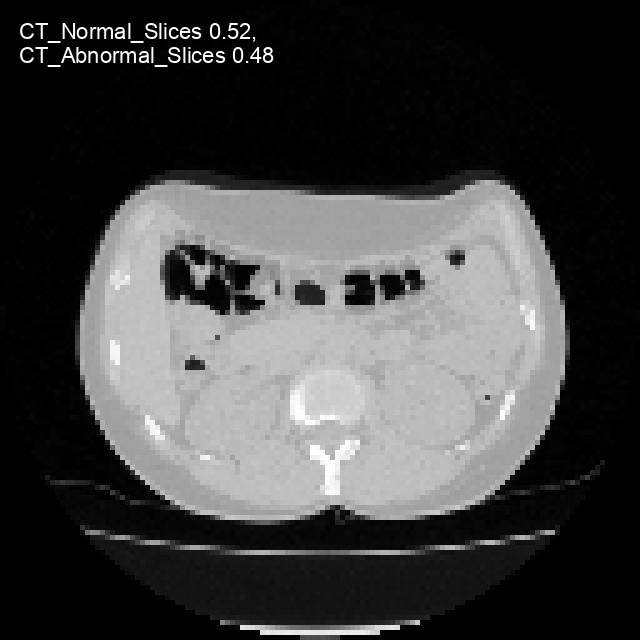

In [7]:
results = model("/content/normal.jpg", save=True, conf=0.5)
results[0].show()

In [8]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'CT_Abnormal_Slices', 1: 'CT_Normal_Slices'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
   

In [9]:
from google.colab import files
files.download('/content/runs/classify/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>